**IMPORTING LIBRARY AND FILE**

In [1]:
library('tidyverse') 
library('leaflet')
library('ggmap')
library('GGally')
library('viridis')
library('plotly')
library('IRdisplay')
library('ggrepel')
library('cowplot')

options(warn = -1)

list.files(path = "../input")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.2.1     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'GGally'


The following object is masked from 'package:dplyr':

    nasa


Loading required package: viridisLite


Attaching package: 'plotly'


The following object is masked from 'package:ggmap':

    wind


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following objec

character(0)

In [2]:
multichoice <- read_csv("C:/Users/zein/Belajar R/multipleChoiceResponses.csv")
#names(multichoice) <- as.data.frame(multichoice[1,])
#multichoice <- multichoice[-1,]

Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.



In [3]:
str(multichoice)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	23860 obs. of  395 variables:
 $ Time from Start to Finish (seconds): chr  "Duration (in seconds)" "710" "434" "718" ...
 $ Q1                                 : chr  "What is your gender? - Selected Choice" "Female" "Male" "Female" ...
 $ Q1_OTHER_TEXT                      : chr  "What is your gender? - Prefer to self-describe - Text" "-1" "-1" "-1" ...
 $ Q2                                 : chr  "What is your age (# years)?" "45-49" "30-34" "30-34" ...
 $ Q3                                 : chr  "In which country do you currently reside?" "United States of America" "Indonesia" "United States of America" ...
 $ Q4                                 : chr  "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?" "Doctoral degree" "Bachelor’s degree" "Master’s degree" ...
 $ Q5                                 : chr  "Which best describes your undergraduate major? - Selected Ch

In [4]:
head(multichoice)

Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,...,What tools and methods do you use to make your work easy to reproduce? (Select all that apply) - Other - Text,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too expensive,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too time-consuming,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Requires too much technical knowledge,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Afraid that others will use my work without giving proper credit,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Not enough incentives to share my work,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - I had never considered making my work easier for others to reproduce,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - None of these reasons apply to me,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Other,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Other - Text
710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NA,NA,NA,NA,NA,NA,NA,NA,-1
434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NA,NA,NA,NA,NA,NA,NA,NA,-1
718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NA,Too time-consuming,NA,NA,NA,NA,NA,NA,-1
621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, sociology, etc.)",Not employed,-1,NA,...,-1,NA,NA,Requires too much technical knowledge,NA,Not enough incentives to share my work,NA,NA,NA,-1
731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NA,Too time-consuming,NA,NA,Not enough incentives to share my work,NA,NA,NA,-1


TEST GRAPH

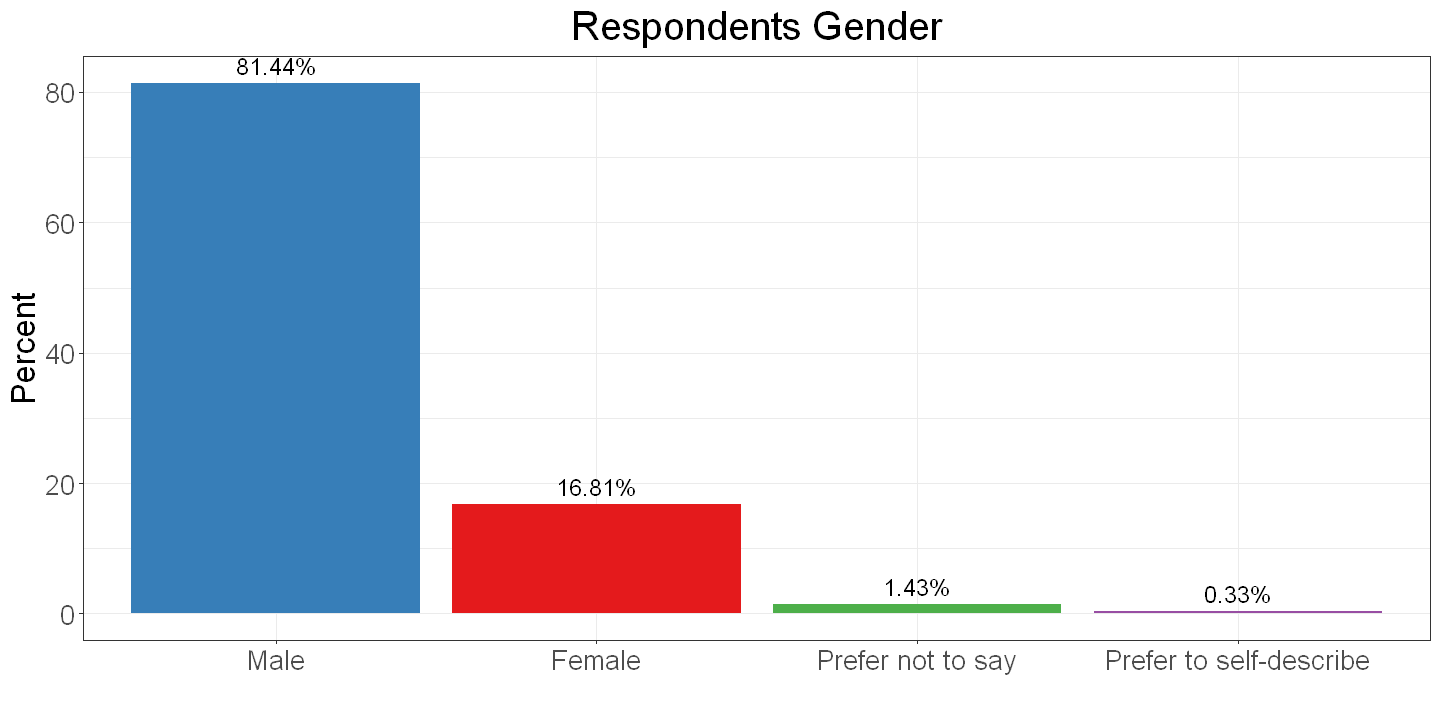

In [5]:
theme1 <- theme_bw()+theme(text = element_text(size=20),
                           legend.position = 'none', plot.title = element_text(hjust = 0.5))

options(repr.plot.width=12, repr.plot.height=6)

multichoice[-1,] %>% group_by(Q1)%>%summarise(Count = length(Q1))%>%
mutate(pct = prop.table(Count)*100)%>%
    ggplot(aes(x = reorder(Q1, -pct), y = pct, fill = Q1)) + 
   geom_bar(stat = 'identity') + scale_fill_brewer(palette="Set1",  na.value = "gray")+
    geom_text(aes(label = sprintf("%.2f%%", pct)), hjust = 0.5,
            vjust = -0.5, size =5)+ theme1+  xlab("") + ylab("Percent")+
              ggtitle("Respondents Gender")

**Bahasa pemrograman yang digunakan dalam data science dan machine learning**

Disini kita dapat melihat bahwa Python dan SQL adalah bahasa pemrograman yang paling banyak digunakan oleh data scientist.

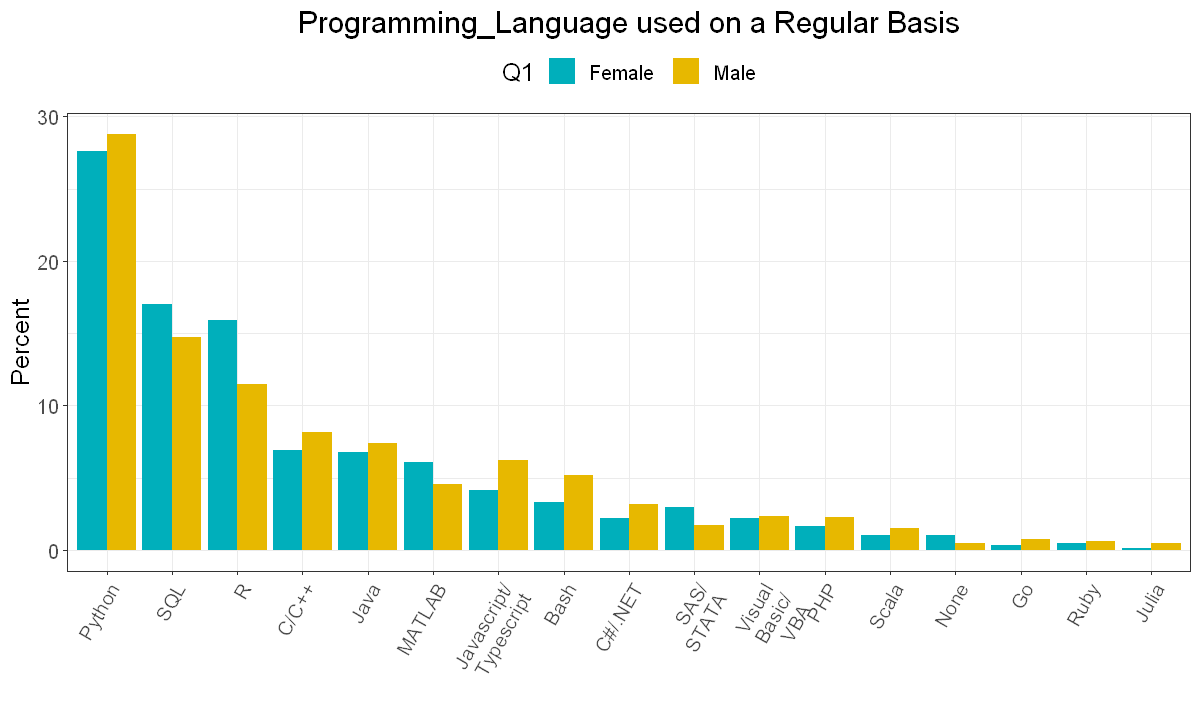

In [6]:
options(repr.plot.width=10, repr.plot.height=6)


theme5 <- theme_bw()+theme(text = element_text(size=15),
                           axis.text.x = element_text(angle = 60, hjust = 1))+
theme(legend.position = 'top', plot.title = element_text(hjust = 0.5))

multichoice %>% 
select(Q1,66:84)%>%
filter(Q1 == "Female"|Q1 == "Male")%>%
gather(2:18, key = "questions", value = "Programming_Language")%>%
group_by(Q1,Programming_Language)%>%
filter(!is.na(Programming_Language))%>%
filter(!is.na(Q1))%>%
summarise(Count = length(Programming_Language))%>%
mutate(percent =  prop.table(Count)*100)%>%
ggplot(aes(x = reorder(Programming_Language,-percent), y = percent, fill = Q1)) + 
geom_col( position = "dodge") + 
scale_fill_manual(values=c("#00AFBB", "#E7B800"))+
   # geom_text(aes(label = sprintf("%.2f%%", percent)), hjust = 0.5,vjust = 0.1, size =3)+ 
      scale_x_discrete(labels = function(x) str_wrap(x, width = 5))+
         theme5+ xlab("") + ylab("Percent")+
              ggtitle("Programming_Language used on a Regular Basis")